In [259]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from string import punctuation
from nltk.probability import FreqDist
from wordcloud import WordCloud

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import numpy as np
import re

# Download dependencies
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [260]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [261]:
data_frame=pd.read_csv('/content/gdrive/MyDrive/chatbot_dataset.csv', encoding='utf-8', delimiter=",",error_bad_lines=False)

<ipython-input-261-7ff69b7fda27>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_frame=pd.read_csv('/content/gdrive/MyDrive/chatbot_dataset.csv', encoding='utf-8', delimiter=",",error_bad_lines=False)


In [262]:
data_frame

,Unnamed: 0.1,Unnamed: 0,question,answer
0,0,0,Who did the first work generally recognized as...,Warren McCulloch and Walter Pitts (1943).\n
1,1,1,What sources was drawn on the formation of the...,knowledge of the basic physiology and function...
2,2,2,Who created the Hebbian learning rule?,Donald Hebb (1949).\n
3,3,3,When the first neural network is built?,1950.\n
4,4,4,What is the first neural network called?,The SNARC.\n
...,...,...,...,...
4348,4348,4348,How do you treat a snake bite?,While waiting for medical help: 1)Move the per...
4349,4349,4349,How do you treat a animal bite?,1)Wash the wound with soap and warm water. 2)G...
4350,4350,4350,What to do if someone is Drowning?,1)Place your ear next to the person's mouth an...
4351,4351,4351,How to give CPR??,"1)For an adult or child, place the heel of one..."


In [263]:
unwantedChars = [
    '\'', 
    '\"',
    '/p',
    'ª',
    'º',
    '.',
    '!',
    '?',
    ',',
    ';',
    ':',
    '-',
    '\'',
    '!!',
    '``',
    '"'
    ]
unwantedWords = [
    '\'s',
    "n't",
    '\'m',
    '\'ll',
    '\'re'
]

stopwords = set(stopwords.words('english') + list(punctuation) + list(unwantedChars) + list (unwantedWords) )

In [264]:
def removeStopWords(text):
  filteredWords = [word for word in word_tokenize(text.lower()) if word not in stopwords]
  return [word for word in filteredWords if len(word) > 1]

question_tokenized = data_frame[:]['question'].apply(removeStopWords)
answer_tokenized = data_frame[:]['answer'].apply(removeStopWords)

def plotWordCloud(data_tokenized):
  allWordsInRows = data_tokenized[:][:]
  allWords = []

  for wordsRow in allWordsInRows:
    allWords.extend(wordsRow)

  frequencies = nltk.FreqDist(allWords)
  sorted(frequencies,key=frequencies.__getitem__, reverse=True)

  wordcloud = WordCloud().generate_from_frequencies(frequencies)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

  return allWordsInRows, frequencies, allWords

def plotFrenquencies(fr):
  fr.plot(20,cumulative=False)


Nuvem de palavras - coluna Question


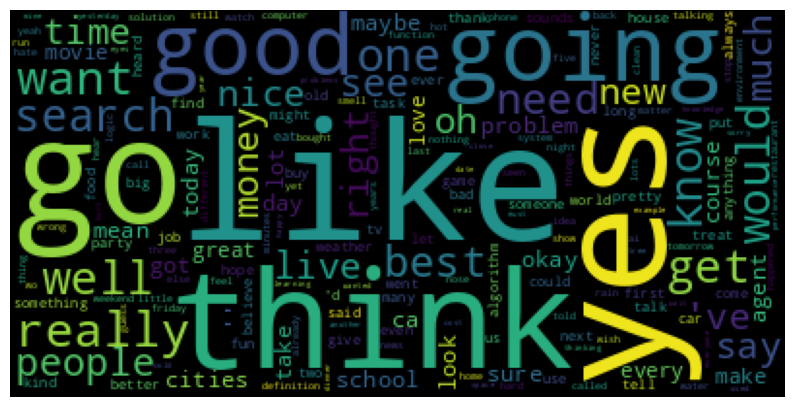

In [265]:
allWords, allWordsInRows, frequencies = plotWordCloud(question_tokenized)


In [267]:
%load_ext google.colab.data_table
df = pd.DataFrame(question_tokenized)
df

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,question
0,"[first, work, generally, recognized, ai]"
1,"[sources, drawn, formation, first, work, gener..."
2,"[created, hebbian, learning, rule]"
3,"[first, neural, network, built]"
4,"[first, neural, network, called]"
...,...
4348,"[treat, snake, bite]"
4349,"[treat, animal, bite]"
4350,"[someone, drowning]"
4351,"[give, cpr]"


Nuvem de palavras e estatisticas - Coluna Answer


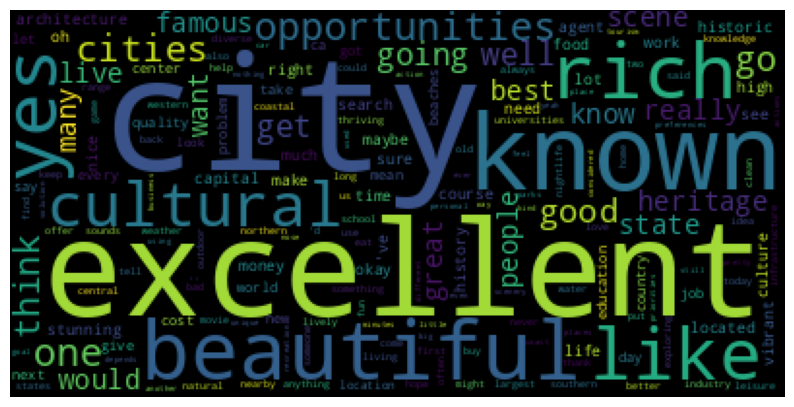

In [268]:
allWords, allWordsInRows, frequencies = plotWordCloud(answer_tokenized)


In [270]:
%load_ext google.colab.data_table
df = pd.DataFrame(answer_tokenized)
df

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,answer
0,"[warren, mcculloch, walter, pitts, 1943]"
1,"[knowledge, basic, physiology, function, neuro..."
2,"[donald, hebb, 1949]"
3,[1950]
4,[snarc]
...,...
4348,"[waiting, medical, help, move, person, beyond,..."
4349,"[wash, wound, soap, warm, water, gently, press..."
4350,"[place, ear, next, person, mouth, nose, feel, ..."
4351,"[adult, child, place, heel, one, hand, center,..."
